In [3]:
inputs = """7,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3""".splitlines()

In [8]:
with open("inputs/day9.txt", "r") as f:
    inputs = f.readlines() 

In [9]:
def parse_inputs(inputs):
    points = []
    for line in inputs:
        vals = line.strip().split(",")
        points.append((int(vals[0]), int(vals[1])))
    return points

points = parse_inputs(inputs)
print(points)


[(98201, 50069), (98201, 51291), (98234, 51291), (98234, 52496), (97862, 52496), (97862, 53680), (97426, 53680), (97426, 54964), (98133, 54964), (98133, 56085), (97239, 56085), (97239, 57278), (97057, 57278), (97057, 58605), (97621, 58605), (97621, 59791), (97303, 59791), (97303, 60984), (97027, 60984), (97027, 62208), (96875, 62208), (96875, 63162), (95751, 63162), (95751, 64324), (95428, 64324), (95428, 65552), (95287, 65552), (95287, 66616), (94668, 66616), (94668, 68009), (94899, 68009), (94899, 68903), (93877, 68903), (93877, 69903), (93154, 69903), (93154, 71156), (92974, 71156), (92974, 72053), (92072, 72053), (92072, 73194), (91647, 73194), (91647, 74234), (91034, 74234), (91034, 75373), (90577, 75373), (90577, 76243), (89695, 76243), (89695, 77242), (89020, 77242), (89020, 78420), (88587, 78420), (88587, 79590), (88114, 79590), (88114, 80518), (87318, 80518), (87318, 81145), (86175, 81145), (86175, 82150), (85483, 82150), (85483, 83090), (84711, 83090), (84711, 84054), (83956,

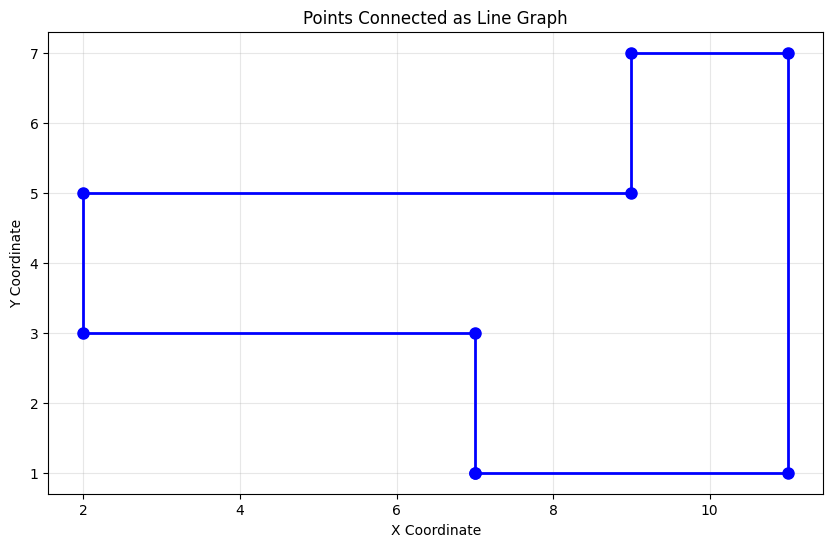

In [5]:
import matplotlib.pyplot as plt

# Extract x and y coordinates from points
x_coords = [point[0] for point in points] + [points[0][0]]
y_coords = [point[1] for point in points] + [points[0][1]]

# Plot as line graph
plt.figure(figsize=(10, 6))
plt.plot(x_coords, y_coords, 'b-o', linewidth=2, markersize=8)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Points Connected as Line Graph')
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
import numpy

def generate_areas(points):
    points_array = numpy.array(points)
    x, y = points_array[:, 0], points_array[:, 1]
    x1, x2 = numpy.meshgrid(x, x, indexing='ij')
    y1, y2 = numpy.meshgrid(y, y, indexing='ij')

    abs_x = abs(x1 - x2) + 1
    abs_y = abs(y1 - y2) + 1

    areas = abs_x * abs_y
    return areas

areas = generate_areas(points)
print(areas)


[[ 1  5 35 21 15 30 18  3]
 [ 5  1  7 21 15 50 30 15]
 [35  7  1  3  9 30 50 25]
 [21 21  3  1  3 24 40 15]
 [15 15  9  3  1  8 24  9]
 [30 50 30 24  8  1  3 18]
 [18 30 50 40 24  3  1  6]
 [ 3 15 25 15  9 18  6  1]]


In [ ]:
def find_max(areas):
    return max([max(row) for row in areas])

max_area = find_max(areas)
print(max_area)

In [19]:
import random

def calculate_direction_vector(point1, point2):
    """Calculate direction vector from point1 to point2"""
    dx = point2[0] - point1[0]
    dy = point2[1] - point1[1]

    if dx != 0:
        dx = int(dx / abs(dx))

    if dy != 0:
        dy = int(dy / abs(dy))

    return (dx, dy)


def calculate_perimiter(points):
    perimiter = []
    for zz, point in enumerate(points):
        next_point = points[(zz + 1) % len(points)]

        perimiter.append(point)

        if next_point[0] == point[0]:
            for y in range(min(point[1] + 1, next_point[1]), max(point[1], next_point[1]) + 1):
                perimiter.append((point[0], y))
        
        else:
            for x in range(min(point[0] + 1, next_point[0]), max(point[0], next_point[0]) + 1):
                perimiter.append((x, point[1]))
    

    # It's really important to randomise to avoid biasing the search to early parts of the 
    # perimiter, which becomes very very slow
    # It might be possible to order optimally, with points likely to be in the center earlier,
    # but this was good enough
    random.shuffle(perimiter)
    return perimiter


max_area = 0

perimiter = calculate_perimiter(points)
x_coords = [point[0] for point in perimiter] + [perimiter[0][0]]
y_coords = [point[1] for point in perimiter] + [perimiter[0][1]]

for i, start in enumerate(points):
    print(f"Point {i} of {len(points)}")
    for end in points[i + 1:]:

        # plt.clf()
        # plt.plot(x_coords, y_coords, 'b-o', linewidth=2, markersize=8)

        def in_area(start, end, point):
            return point[0] > min(start[0], end[0]) and point[0] < max(start[0], end[0]) and \
                point[1] > min(start[1], end[1]) and point[1] < max(start[1], end[1])

        def point_in_area(start, end, perimiter_points):
            for _, point in enumerate(perimiter_points):

                if in_area(start, end, point):
                    # print("Inside area:", point)
                    # print(f"Discounting {start}-{end} because of {point}")
                    return True
        
            return False


        point_in_area = point_in_area(start, end, perimiter)

        if not point_in_area:
            area = abs(start[0] - end[0]) + 1
            area *= abs(start[1] - end[1]) + 1
            if area > max_area:
                max_area = area

        # plt.plot((start[0], start[0], end[0], end[0], start[0]), (start[1], end[1], end[1], start[1], start[1]), line_style, linewidth=2)
        # plt.show()


print("Max area:", str(max_area))

Point 0 of 496
Point 1 of 496
Point 1 of 496
Point 2 of 496
Point 2 of 496
Point 3 of 496
Point 3 of 496
Point 4 of 496
Point 4 of 496
Point 5 of 496
Point 5 of 496
Point 6 of 496
Point 6 of 496
Point 7 of 496
Point 7 of 496
Point 8 of 496
Point 8 of 496
Point 9 of 496
Point 9 of 496
Point 10 of 496
Point 10 of 496
Point 11 of 496
Point 11 of 496
Point 12 of 496
Point 12 of 496
Point 13 of 496
Point 13 of 496
Point 14 of 496
Point 14 of 496
Point 15 of 496
Point 15 of 496
Point 16 of 496
Point 16 of 496
Point 17 of 496
Point 17 of 496
Point 18 of 496
Point 18 of 496
Point 19 of 496
Point 19 of 496
Point 20 of 496
Point 20 of 496
Point 21 of 496
Point 21 of 496
Point 22 of 496
Point 22 of 496
Point 23 of 496
Point 23 of 496
Point 24 of 496
Point 24 of 496
Point 25 of 496
Point 25 of 496
Point 26 of 496
Point 26 of 496
Point 27 of 496
Point 27 of 496
Point 28 of 496
Point 28 of 496
Point 29 of 496
Point 29 of 496
Point 30 of 496
Point 30 of 496
Point 31 of 496
Point 31 of 496
Point 32 of